In [2]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")

data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv")

data.shape

/tmp/ipykernel_52/2979494565.py:4: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv")


(11431, 1794)

In [17]:
import pandas as pd

# 假设您的数据存储在名为 df 的 DataFrame 中
df_clean = data[['WELLNESS_malach_pines_burnout_measure_hopeless', 'CONNECTION_social_days_family_p7d_grouped']].dropna()
df_clean = df_clean[df_clean['CONNECTION_social_days_family_p7d_grouped'] != 'Presented but no response']
df_clean = df_clean[df_clean['WELLNESS_malach_pines_burnout_measure_hopeless'] != 'Presented but no response']

# 如果有需要去除的特定值，可以使用以下代码
# df_clean = df_clean[df_clean['变量名'] != '不符合条件的值']
# 定义映射字典
mapping = {'Never': 0, 'Almost never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Very Often': 5, 'Always': 6}
df_clean['WELLNESS_malach_pines_burnout_measure_hopeless'] = df_clean['WELLNESS_malach_pines_burnout_measure_hopeless'].map(mapping)

# 重新定义映射字典，根据实际数据调整
mapping = {'None (0 Days)': 0, 'Some days (1 - 3 days)': 1, 'Most days (4 - 6 days)': 2, 'Every day (7 days)': 3}
df_clean['CONNECTION_social_days_family_p7d_grouped'] = df_clean['CONNECTION_social_days_family_p7d_grouped'].map(mapping)

# 检查映射结果
print(df_clean['WELLNESS_malach_pines_burnout_measure_hopeless'].unique())
print(df_clean['CONNECTION_social_days_family_p7d_grouped'].unique())
df_dummy = pd.get_dummies(df_clean['CONNECTION_social_days_family_p7d_grouped'], prefix='CONNECTION', drop_first=True)
df_model = pd.concat([df_clean['WELLNESS_malach_pines_burnout_measure_hopeless'], df_dummy], axis=1)

# 删除任何存在缺失值的行
df_model = df_model.dropna()

# 确保所有列都是数值型
df_model = df_model.apply(pd.to_numeric)


import statsmodels.api as sm

# 定义因变量和自变量
Y = df_model['WELLNESS_malach_pines_burnout_measure_hopeless']
X = df_model.drop('WELLNESS_malach_pines_burnout_measure_hopeless', axis=1)


# 添加常数项
X = sm.add_constant(X)

# 确保 X 和 Y 都是数值型
Y = Y.astype(float)
X = X.astype(float)


# 拟合模型
model = sm.OLS(Y, X).fit()

# 输出结果
print(model.summary())


[0 3 4 1 2 5 6]
[3 0 2 1]
                                          OLS Regression Results                                          
Dep. Variable:     WELLNESS_malach_pines_burnout_measure_hopeless   R-squared:                       0.016
Model:                                                        OLS   Adj. R-squared:                  0.015
Method:                                             Least Squares   F-statistic:                     23.56
Date:                                            Fri, 29 Nov 2024   Prob (F-statistic):           4.02e-15
Time:                                                    22:32:51   Log-Likelihood:                -8100.0
No. Observations:                                            4442   AIC:                         1.621e+04
Df Residuals:                                                4438   BIC:                         1.623e+04
Df Model:                                                       3                                         
Covariance 

回归系数（Coefficient）： [-0.18302635]
截距（Intercept）： 2.472128211244247


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


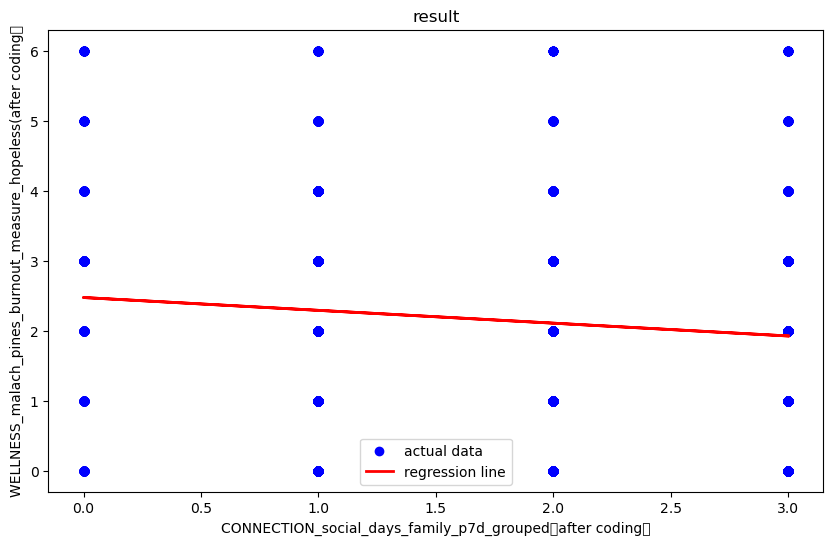

In [19]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# 假设您的数据存储在DataFrame中，命名为df
# df = pd.read_csv('your_data.csv')

# 对因变量进行编码
le_y = LabelEncoder()
df_clean['WELLNESS_encoded'] = le_y.fit_transform(df_clean['WELLNESS_malach_pines_burnout_measure_hopeless'])

# 对自变量进行编码
le_X = LabelEncoder()
df_clean['CONNECTION_encoded'] = le_X.fit_transform(df_clean['CONNECTION_social_days_family_p7d_grouped'])

# 准备数据进行线性回归
X = df_clean[['CONNECTION_encoded']]
y = df_clean['WELLNESS_encoded']

# 创建线性回归模型并进行拟合
model = LinearRegression()
model.fit(X, y)

# 输出模型的系数和截距
print('回归系数（Coefficient）：', model.coef_)
print('截距（Intercept）：', model.intercept_)

# 预测值
y_pred = model.predict(X)

# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='regression line')
plt.xlabel('CONNECTION_social_days_family_p7d_grouped（after coding）')
plt.ylabel('WELLNESS_malach_pines_burnout_measure_hopeless(after coding）')
plt.title('result')
plt.legend()
plt.show()


/tmp/ipykernel_52/4289132273.py:8: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


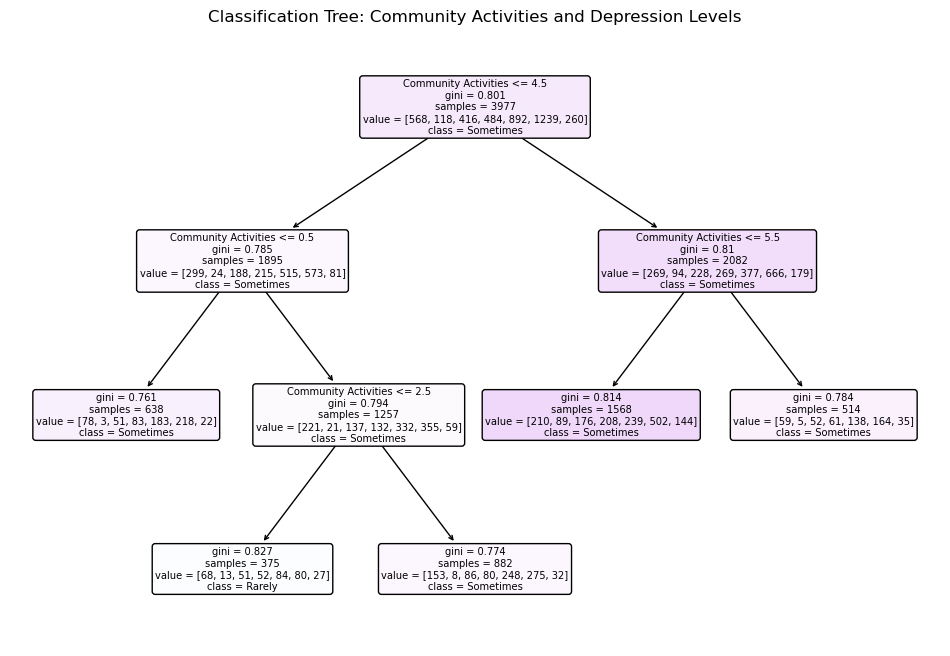

In [17]:
# Re-importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")

data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

# Strip column names to remove any extra spaces
data.columns = data.columns.str.strip()

# Check the correct column names and select the relevant columns
try:
    data = data[['WELLNESS_malach_pines_burnout_measure_depressed', 'CONNECTION_activities_community_p3m']].dropna()

    # Encode categorical variables
    label_encoder_dep = LabelEncoder()
    label_encoder_com = LabelEncoder()

    data['depressed_encoded'] = label_encoder_dep.fit_transform(data['WELLNESS_malach_pines_burnout_measure_depressed'])
    data['community_encoded'] = label_encoder_com.fit_transform(data['CONNECTION_activities_community_p3m'])

    # Prepare features (X) and target (y)
    X = data[['community_encoded']]
    y = data['depressed_encoded']

    # Initialize and train the Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=3, random_state=42)
    clf.fit(X, y)

    # Plot the classification tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=['Community Activities'], class_names=label_encoder_dep.classes_, filled=True, rounded=True)
    plt.title('Classification Tree: Community Activities and Depression Levels')
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}. Please check the column names in the dataset.")
    print("Available columns:", df_uploaded.columns.tolist())


/tmp/ipykernel_52/1425901672.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=x_variable, y=y_variable, data=filtered_df, ci=None)


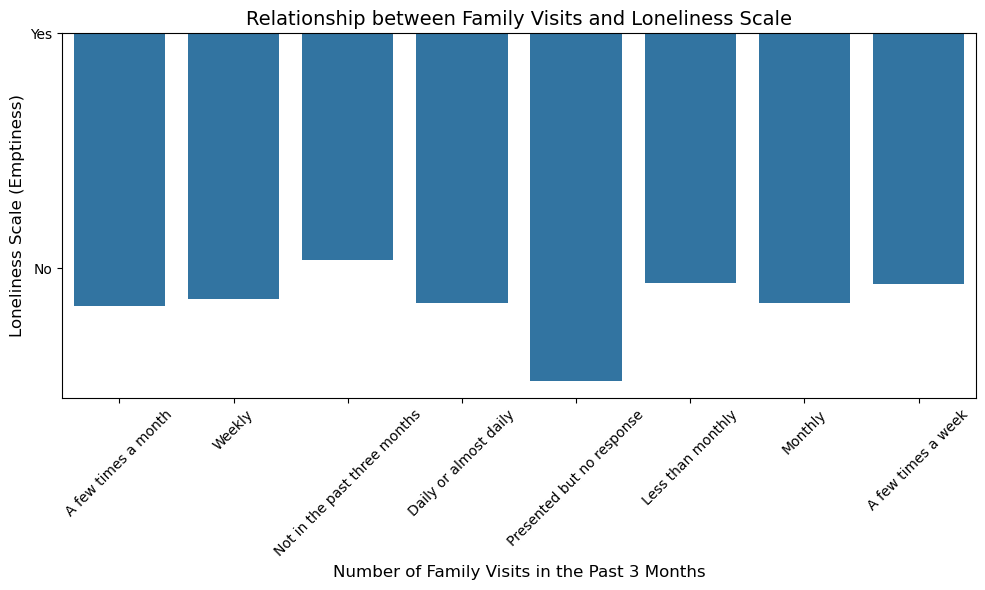

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for analysis
x_variable = 'CONNECTION_activities_visited_family_p3m'
y_variable = 'LONELY_dejong_emotional_social_loneliness_scale_emptiness'

# Drop rows with missing values for the selected variables
filtered_df = data[[x_variable, y_variable]].dropna()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=x_variable, y=y_variable, data=filtered_df, ci=None)

# Add labels and title
plt.title('Relationship between Family Visits and Loneliness Scale', fontsize=14)
plt.xlabel('Number of Family Visits in the Past 3 Months', fontsize=12)
plt.ylabel('Loneliness Scale (Emptiness)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()